In [ ]:
!nvidia-smi

Tue Jun 25 16:48:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/YOLOV8

/content/drive/MyDrive/YOLOV8


In [ ]:
%cd /content/drive/MyDrive/YOLOV8
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=200 plots=True

/content/drive/MyDrive/YOLOV8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=200, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

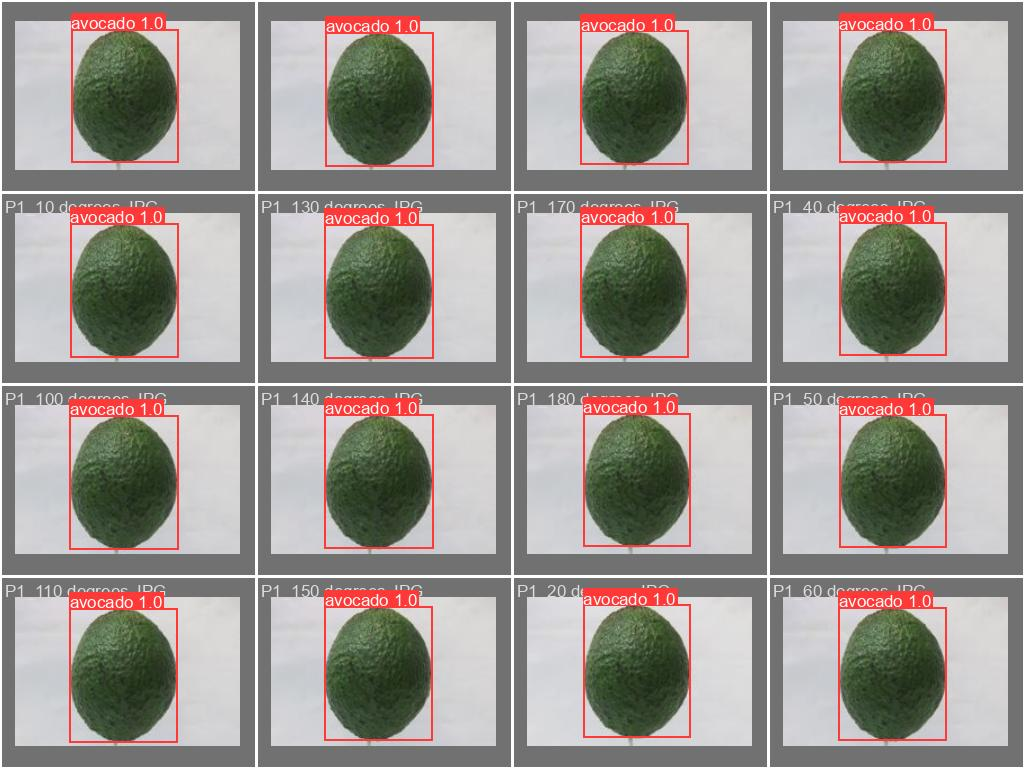

In [6]:
Image(filename="/content/drive/MyDrive/YOLOV8/runs/detect/train/val_batch0_pred.jpg",width=600)

In [7]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2024-06-26 06:44:47.496432: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 06:44:47.496487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 06:44:47.543155: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 06:44:47.555824: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 06:44:48.705672: W tensorflow/comp

In [8]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=avac-data/test/images

2024-06-26 06:45:53.788877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 06:45:53.788929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 06:45:53.790245: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 06:45:53.796935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 06:45:55.378780: W tensorflow/comp

In [8]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("runs/detect/train/weights/best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("/content/drive/MyDrive/YOLOV8/avo-img.png", save=True, imgsz=462, conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ --img-size [462] must be multiple of max stride 32, updating to [480]
Results saved to runs/detect/predict5


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([3, 6])
 dtype: torch.float32
  + tensor([[230.00000,  25.00000, 347.00000, 185.00000,   0.99874,   0.00000],
         [136.00000, 247.00000, 274.00000, 457.00000,   0.97964,   0.00000],
         [ 66.00000, 177.00000, 165.00000, 314.00000,   0.95373,   0.00000]])]

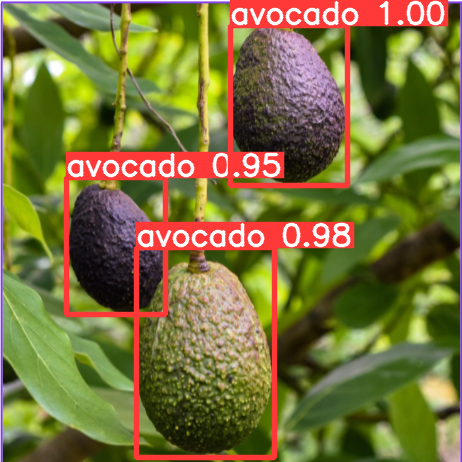

In [9]:
Image(filename="/content/drive/MyDrive/YOLOV8/runs/detect/predict5/avo-img.png",width=462)